<a href="https://colab.research.google.com/github/Shubham-1707/Assignments/blob/master/Duplicate_Sentences_Identification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import re
import string

import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [2]:
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
pip install -U gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 40.7 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [5]:
!python -m pip install -U gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# New Section

In [6]:
df = pd.read_csv('/content/questions.csv')

In [7]:
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [8]:
df.groupby('is_duplicate').describe()

id                                                         \
                 count           mean            std  min       25%       50%   
is_duplicate                                                                    
0             255045.0  202958.179937  117027.615501  0.0  101605.0  203165.0   
1             149306.0  200837.169457  116197.758898  5.0  100183.0  200479.5   

                                       qid1                 ...            \
                    75%       max     count           mean  ...       75%   
is_duplicate                                                ...             
0             304479.00  404350.0  255045.0  392305.053316  ...  590419.0   
1             301292.75  404347.0  149306.0  391048.269266  ...  587967.0   

                            qid2                                      \
                   max     count           mean            std   min   
is_duplicate                                                           
0             789800.0  255045.0  389856.136396  229558.811742   2.0   
1             789794.0  149306.0  390776.485078  227507.463550  12.0   

                                                      
                   25%       50%       75%       max  
is_duplicate                                          
0             189761.0  387476.0  588317.0  789801.0  
1             193116.0  389638.5  587675.0  789795.0  

[2 rows x 24 columns]

In [9]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [10]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404351.000000,404351.000000,404351.000000,404351.000000
mean,202175.000000,391840.987691,390195.973765,0.369248
std,116726.223686,228430.857607,228803.645742,0.482602
min,0.000000,1.000000,2.000000,0.000000
25%,101087.500000,193381.000000,191012.000000,0.000000
50%,202175.000000,390630.000000,388364.000000,0.000000
75%,303262.500000,589514.000000,588071.000000,1.000000
max,404350.000000,789800.000000,789801.000000,1.000000


0    63.07515
1    36.92485
Name: is_duplicate, dtype: float64


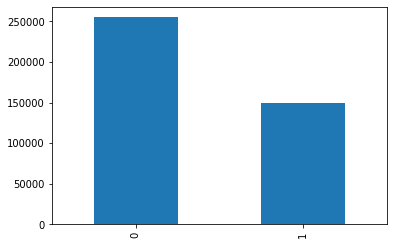

In [11]:
print((df["is_duplicate"].value_counts()/df["is_duplicate"].count())*100)
df["is_duplicate"].value_counts().plot(kind="bar")

In [12]:
import numpy as np

In [13]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 789801
Number of questions getting repeated 13698


In [14]:
df['is_duplicate'].value_counts()

0    255045
1    149306
Name: is_duplicate, dtype: int64

In [15]:
df_duplicate = df[df['is_duplicate']==1]
df_duplicate.shape

(149306, 6)

In [16]:
df_unique = df[df['is_duplicate']==0]
df_unique.shape

(255045, 6)

In [17]:
df_unique_downsampled = df_unique.sample(df_duplicate.shape[0])
df_unique_downsampled.shape

(149306, 6)

In [18]:
len(df)

404351

In [19]:
df_balanced = pd.concat([df_unique_downsampled, df_duplicate])
df_balanced.shape

(298612, 6)

In [20]:
df_balanced['is_duplicate'].value_counts()


0    149306
1    149306
Name: is_duplicate, dtype: int64

In [21]:
df_balanced.head()

,id,qid1,qid2,question1,question2,is_duplicate
33567,33567,66900,66901,What is it like to attend a State of the Union...,How can I attend the State of the Union Address?,0
28769,28769,57359,57360,Should I take a break from my girlfriend?,Should I break up with my girlfriend?,0
32343,32343,64464,64465,What brand makes the most durable/heavyduty ts...,What brands make great neck ties?,0
257660,257660,393059,507138,"How do you ask ""where do you live"" without se...",How do I complement a woman without being creepy?,0
387765,387765,758081,758082,Why aren't most atheists scared of dying?,Are theists less scared than atheists of dying...,0


In [22]:
df_balanced_drop = df_balanced[df_balanced['question1'].isna()]
df_balanced_drop.index

Int64Index([363416], dtype='int64')

In [23]:
df_balanced['question1'].nunique()

212738

In [24]:
df_balanced.drop(labels=df_balanced_drop.index,inplace=True)

In [25]:
df_balanced.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       1
is_duplicate    0
dtype: int64

In [26]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298611 entries, 33567 to 404347
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            298611 non-null  int64 
 1   qid1          298611 non-null  int64 
 2   qid2          298611 non-null  int64 
 3   question1     298611 non-null  object
 4   question2     298610 non-null  object
 5   is_duplicate  298611 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 15.9+ MB


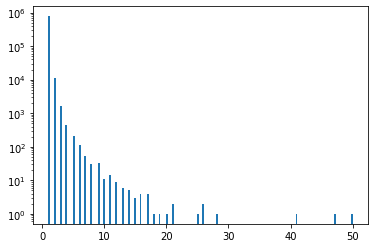

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [28]:
que_df = df_balanced[["question1","question2"]]
que_df.head()

,question1,question2
33567,What is it like to attend a State of the Union...,How can I attend the State of the Union Address?
28769,Should I take a break from my girlfriend?,Should I break up with my girlfriend?
32343,What brand makes the most durable/heavyduty ts...,What brands make great neck ties?
257660,"How do you ask ""where do you live"" without se...",How do I complement a woman without being creepy?
387765,Why aren't most atheists scared of dying?,Are theists less scared than atheists of dying...


In [29]:
from sklearn.feature_extraction.text import CountVectorizer

questions = list(que_df["question1"]) + list(que_df["question2"])

# merging the dataset of questions in to a list

In [30]:
len(questions)

597222

In [31]:
questions[0:5]

['What is it like to attend a State of the Union Address?',
 'Should I take a break from my girlfriend?',
 'What brand makes the most durable/heavyduty tshirt?',
 'How do  you ask "where do you live" without seeming creepy?',
 "Why aren't most atheists scared of dying?"]

In [32]:
import string
from nltk.corpus import stopwords

In [33]:
X=df_balanced['question1'] + df_balanced['question2']
y=df_balanced['is_duplicate']

In [34]:
print(X)

33567     What is it like to attend a State of the Union...
28769     Should I take a break from my girlfriend?Shoul...
32343     What brand makes the most durable/heavyduty ts...
257660    How do  you ask "where do you live" without se...
387765    Why aren't most atheists scared of dying?Are t...
                                ...                        
404341    What are some outfit ideas to wear to a frat p...
404342    Why is Manaphy childish in Pokémon Ranger and ...
404343    How does a long distance relationship work?How...
404345    What does Jainism say about homosexuality?What...
404347    Do you believe there is life after death?Is it...
Length: 298611, dtype: object


In [35]:
cv=CountVectorizer(stop_words='english')

In [36]:
X=cv.fit_transform(X.apply(lambda x: np.str_(x)))

In [37]:
type(X)

scipy.sparse.csr.csr_matrix

In [38]:
print(X)

  (0, 36937)	1
  (0, 7167)	2
  (0, 59168)	2
  (0, 65010)	2
  (0, 3914)	2
  (1, 10630)	2
  (1, 26858)	2
  (2, 10574)	1
  (2, 38393)	1
  (2, 20758)	1
  (2, 28989)	1
  (2, 63958)	1
  (2, 10581)	1
  (2, 38384)	1
  (2, 27591)	1
  (2, 42804)	1
  (2, 62631)	1
  (3, 6771)	1
  (3, 37184)	1
  (3, 16502)	2
  (3, 14970)	1
  (3, 68304)	1
  (4, 6409)	1
  (4, 7042)	2
  (4, 55114)	2
  :	:
  (298606, 25400)	2
  (298607, 55509)	2
  (298607, 48318)	1
  (298607, 48337)	1
  (298607, 5701)	1
  (298607, 61847)	2
  (298607, 38553)	2
  (298607, 51351)	2
  (298607, 13333)	1
  (298608, 19983)	1
  (298608, 68380)	1
  (298608, 37446)	2
  (298608, 52415)	1
  (298608, 52416)	1
  (298608, 19725)	2
  (298608, 38345)	1
  (298609, 55019)	2
  (298609, 19983)	2
  (298609, 26322)	1
  (298609, 29831)	2
  (298609, 33435)	2
  (298610, 8811)	1
  (298610, 36856)	2
  (298610, 17747)	2
  (298610, 63875)	1


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [42]:
classifiers=[['Logistic Regression :',LogisticRegression()],
       ['MultinomialNB:',MultinomialNB()]]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(y_test,predictions))
    print(name,accuracy_score(y_test,predictions))

Logistic Regression : 0.7225732273620289
MultinomialNB: 0.7105063404179318


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [43]:
y_axis=['Logistic Regression','MultinonialNB']
x_axis=cla_pred

Text(0.5, 0, 'Accuracy')

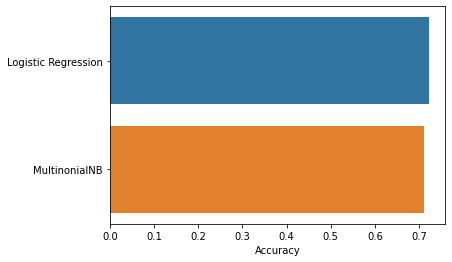

In [44]:
sns.barplot(x=x_axis,y=y_axis)
plt.xlabel('Accuracy')

In [45]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [46]:
from sklearn.pipeline import Pipeline


In [47]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words = 'english')),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [48]:
X=df_balanced['question1']+df_balanced['question2']
y=df_balanced['is_duplicate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [49]:
pipeline.fit(X_train.apply(lambda x: np.str_(x)),y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('bow', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [50]:
predictions2=pipeline.predict(X_test.apply(lambda x: np.str_(x)))

In [51]:
print(accuracy_score(y_test,predictions2))
print(classification_report(y_test,predictions2))
print(confusion_matrix(y_test,predictions2))

0.7269713341668155
              precision    recall  f1-score   support

           0       0.72      0.75      0.73     44849
           1       0.74      0.71      0.72     44735

    accuracy                           0.73     89584
   macro avg       0.73      0.73      0.73     89584
weighted avg       0.73      0.73      0.73     89584

[[33574 11275]
 [13184 31551]]


In [65]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

NotFoundError: ignored

In [52]:
def clean_text(text): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [53]:
import nltk
nltk.download('stopwords') # run this one time

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
df_balanced['question1']

33567     What is it like to attend a State of the Union...
28769             Should I take a break from my girlfriend?
32343     What brand makes the most durable/heavyduty ts...
257660    How do  you ask "where do you live" without se...
387765            Why aren't most atheists scared of dying?
                                ...                        
404341    What are some outfit ideas to wear to a frat p...
404342    Why is Manaphy childish in Pokémon Ranger and ...
404343          How does a long distance relationship work?
404345           What does Jainism say about homosexuality?
404347            Do you believe there is life after death?
Name: question1, Length: 298611, dtype: object

In [55]:
df_balanced.dropna(axis = 0, how ='any',inplace=True) 






df_balanced['question1'] = df_balanced['question1'].apply(clean_text)
df_balanced['question2'] = df_balanced['question2'].apply(clean_text)
df_balanced['Num_words_text'] = df_balanced['question1'].apply(lambda x:len(str(x).split()))
df_balanced['Num_words_text'] = df_balanced['question1'].apply(lambda x:len(str(x).split()))

print('-------Dataset --------')
print(df_balanced['is_duplicate'].value_counts())
print(len(df_balanced))
print('-------------------------')




#all_sentences = train_data['text'].tolist() + test_data['text'].tolist()

-------Dataset --------
1    149306
0    149304
Name: is_duplicate, dtype: int64
298610
-------------------------


In [56]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split()
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
df_balanced['question1']=df_balanced['question1'].apply(remove_stopwords)
df_balanced['question2']=df_balanced['question2'].apply(remove_stopwords)

In [57]:
df_balanced['question1'].head(10)

33567             like attend state union address
28769                       take break girlfriend
32343         brand makes durableheavyduty tshirt
257660                live without seeming creepy
387765                arent atheists scared dying
362969                           relativity space
230331                               right mother
110903            jews consider human even bother
327807    meaning normal probability distribution
246914                                movies like
Name: question1, dtype: object

In [58]:
!python -m spacy download en_core_web_md 

2022-08-24 05:58:48.863573: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.8 MB 1.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [67]:
import spacy

In [68]:
nlp = spacy.load('en_core_web_sm')
print(nlp)

In [69]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [70]:
ques_list1=df_balanced['question1'].tolist()
ques_list2=df_balanced['question2'].tolist()
print(ques_list1[1])

tokenized_questions1 = lemmatization(ques_list1)

print(tokenized_questions1[1])


take break girlfriend
['break', 'girlfriend']


In [71]:
print(ques_list2[1])

tokenized_questions2 = lemmatization(ques_list2)

print(tokenized_questions2[1])

break girlfriend
['girlfriend']


In [72]:
tokenized_ques_list = tokenized_questions1 + tokenized_questions2

In [73]:
tokenized_ques_list[0:7]

[['state', 'union', 'address'],
 ['break', 'girlfriend'],
 ['brand', 'durableheavyduty', 'tshirt'],
 ['creepy'],
 ['atheist'],
 ['relativity', 'space'],
 ['right', 'mother']]

In [74]:
len(tokenized_ques_list)

597220

In [75]:
type(tokenized_ques_list)

list

In [76]:
dictionary = corpora.Dictionary(tokenized_ques_list)
doc_term_matrix = [dictionary.doc2bow(ques) for ques in tokenized_ques_list]

In [77]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [78]:
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [83]:
lda_model.print_topics()

[(0,
  '0.055*"possible" + 0.034*"work" + 0.029*"computer" + 0.026*"easy" + 0.022*"much" + 0.020*"science" + 0.019*"purpose" + 0.018*"mobile" + 0.016*"next" + 0.016*"travel"'),
 (1,
  '0.072*"good" + 0.043*"rupee" + 0.034*"phone" + 0.034*"indian" + 0.028*"engineering" + 0.026*"love" + 0.022*"earth" + 0.020*"company" + 0.019*"decision" + 0.016*"day"'),
 (2,
  '0.105*"time" + 0.039*"effect" + 0.031*"free" + 0.030*"long" + 0.028*"friend" + 0.025*"exam" + 0.024*"email" + 0.023*"video" + 0.023*"great" + 0.022*"game"'),
 (3,
  '0.049*"girl" + 0.045*"number" + 0.042*"example" + 0.038*"government" + 0.034*"laptop" + 0.025*"college" + 0.025*"traffic" + 0.022*"service" + 0.019*"height" + 0.015*"available"'),
 (4,
  '0.074*"difference" + 0.048*"black" + 0.029*"energy" + 0.022*"iphone" + 0.019*"true" + 0.018*"earthquake" + 0.016*"temperature" + 0.016*"software" + 0.015*"suicide" + 0.013*"problem"'),
 (5,
  '0.104*"quora" + 0.074*"question" + 0.053*"weight" + 0.028*"election" + 0.025*"account" + 0.

In [76]:
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
 import pyLDAvis.gensim_models

In [89]:
import pyLDAvis.gensim_models
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  return pd.DataFrame({'Term': vocab[term_ix], \


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.339559 -0.014767       1        1  13.259833
1      0.322780 -0.008792       2        1  10.511438
9     -0.079607  0.196932       3        1  10.483610
8     -0.098650 -0.267929       4        1  10.181945
5     -0.088216 -0.263439       5        1  10.057687
6     -0.073418  0.087102       6        1   9.805369
4     -0.075975  0.108674       7        1   9.384387
0     -0.092360 -0.068288       8        1   9.072682
2     -0.075692  0.102357       9        1   8.775181
3     -0.078422  0.128149      10        1   8.467869, topic_info=           Term          Freq         Total Category  logprob  loglift
26         good  73810.000000  73810.000000  Default  30.0000  30.0000
173      people  25534.000000  25534.000000  Default  29.0000  29.0000
591        life  18969.000000  18969.000000  Default  28.0000  28.0000
256       money  18677.000000  18677.000000  Default  27.0000  27.0000
20        quora  17532.000000  17532.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
741      device    918.640204    919.664067  Topic10  -5.0372   2.4678
567        drug    912.239189    913.263094  Topic10  -5.0442   2.4678
748  programmer    860.249740    861.273603  Topic10  -5.1029   2.4677
566      center    860.075642    861.099503  Topic10  -5.1031   2.4677
495        bike    857.516436    858.540300  Topic10  -5.1061   2.4677

[338 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
187       5  0.999807    account
1714      7  0.999172      actor
4426      3  0.999044  addiction
757       3  0.999121     animal
940       5  0.999624     answer
...     ...       ...        ...
1896      1  0.999506     writer
1660      5  0.999475    writing
836       7  0.999448      wrong
42        6  0.999913       year
481       9  0.999149    youtube

[310 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 2, 10, 9, 6, 7, 5, 1, 3, 4])

In [86]:
!pip install pyLDAvis==2.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.4 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=4b9943659e4666efebb5a94b78cce6055448269dfd6ad92265937857203b7e24
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis
  Attempting uninstall: pyLDAvis
    Found existing installation: pyLDAvis 3.3.1
    Uninstalling pyLDAvis-3.3.1:
      Successfully uninstalled pyLDAvis-3.3.1


In [92]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_ques_list, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -14.360449039429021


IndexError: ignored

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
